### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [2]:
#reading data
df=pd.read_csv(r"C:\Users\rakhi\Downloads\data (2).csv")

In [3]:
#first five rows
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


### Data Correction

In [4]:
#number of rows and columns
df.shape

(32, 5)

In [5]:
df.columns

Index(['Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [6]:
df.dtypes

Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [7]:
#correcting datatype of column 'Date'
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Duration             int64
Date        datetime64[ns]
Pulse                int64
Maxpulse             int64
Calories           float64
dtype: object

In [9]:
#checking duplicated values
df.duplicated().any()

True

In [10]:
#accessing duplicated rows
df.loc[df.duplicated(), :]

,Duration,Date,Pulse,Maxpulse,Calories
12,60,2020-12-12,100,120,250.7


In [11]:
#dropping duplicated rows
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

There are no duplicate rows.

In [13]:
#checking missing values
df.isna().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [14]:
#checking which date is missing
print(pd.date_range(start="2020-12-01", end="2020-12-31").difference(df['Date']))

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', freq=None)


In [15]:
#filling the missing value with correct date
df["Date"]=df["Date"].fillna("2020-12-22")

In [16]:
#mean of column 'Calories'
cal_mean=df["Calories"].mean()
cal_mean

306.5413793103448

In [17]:
#filling missing value with mean of the column
df["Calories"]=df["Calories"].fillna(cal_mean)

In [18]:
#recheking presence of missing values
df.isna().sum().sum()

0

In [19]:
#statistical description
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,31.000000,31.000000,31.000000,31.000000
mean,68.709677,103.612903,128.774194,306.541379
std,71.180144,7.935899,13.119222,64.115560
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,252.000000
50%,60.000000,103.000000,128.000000,300.000000
75%,60.000000,107.000000,132.500000,342.650000
max,450.000000,130.000000,175.000000,479.000000


<AxesSubplot:>

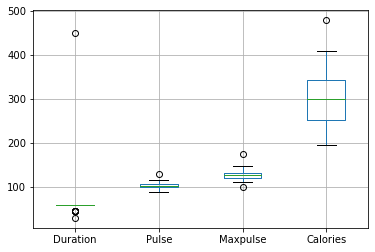

In [20]:
#checking outliers
df.boxplot()

In [21]:
#checking abnormal values of 'Duration'
df[df['Duration']>60]

,Duration,Date,Pulse,Maxpulse,Calories
7,450,2020-12-08 00:00:00,104,134,253.3


In [22]:
#correcting the abnormal value
df['Duration'].mask(df['Duration']==450,45,inplace=True)

Other outliers are genuine values. So we retain them.

### Visualisation

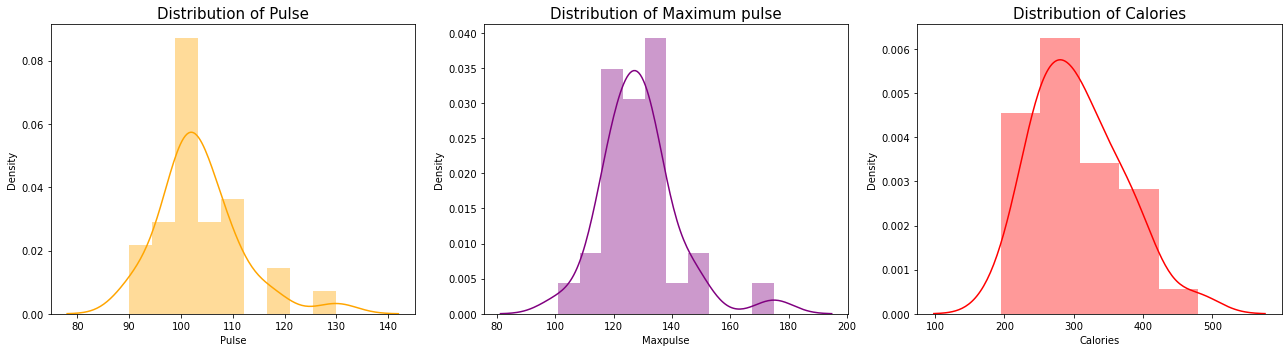

In [23]:
#distribution plot
plt.figure(figsize=(18,5))

plt.subplot(131)
sns.distplot(df["Pulse"],color="orange")
plt.title("Distribution of Pulse",fontsize=15)

plt.subplot(132)
sns.distplot(df["Maxpulse"],color='purple')
plt.title("Distribution of Maximum pulse",fontsize=15)

plt.subplot(133)
sns.distplot(df["Calories"],color='red')
plt.title("Distribution of Calories",fontsize=15)

plt.tight_layout()

We can see that the distribution is normal which is right skewed.

<AxesSubplot:xlabel='Duration', ylabel='count'>

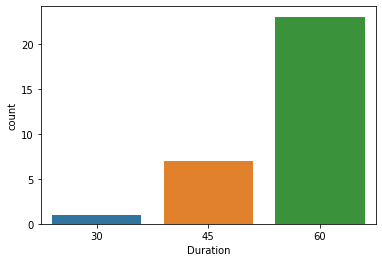

In [24]:
#countplot
sns.countplot(df['Duration'])

Duration 60 occurs the most and 30 occurs the least.

<AxesSubplot:xlabel='Pulse', ylabel='count'>

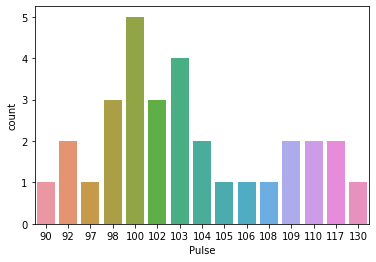

In [25]:
sns.countplot(df['Pulse'])

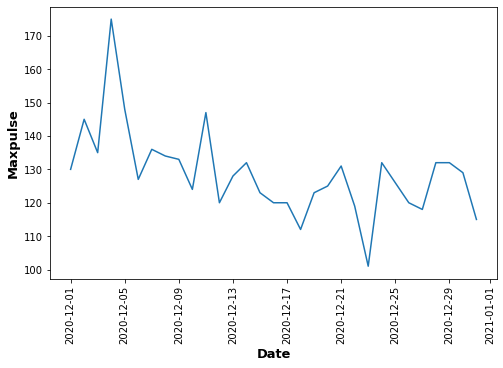

In [26]:
#lineplot
plt.figure(figsize=(8,5))
sns.lineplot(x = 'Date',y='Maxpulse',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.xticks(rotation=90)
plt.ylabel("Maxpulse",fontweight='bold',size=13)
plt.show()

Maxpulse decreased towards the end of the month.

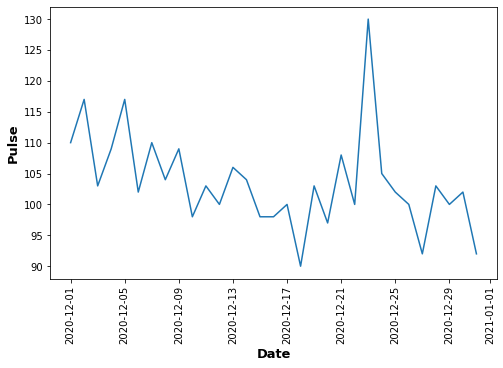

In [27]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'Date',y='Pulse',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.xticks(rotation=90)
plt.ylabel("Pulse",fontweight='bold',size=13)
plt.show()

Pulse shows a high variance towards the end of the month.

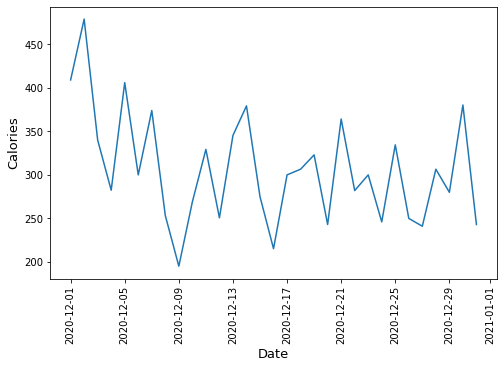

In [28]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'Date',y='Calories',data=df)
plt.xlabel("Date",size=13)
plt.xticks(rotation=90)
plt.ylabel("Calories",size=13)
plt.show()

Calorie was highest during the start of the month and it attained a medium value gradually.

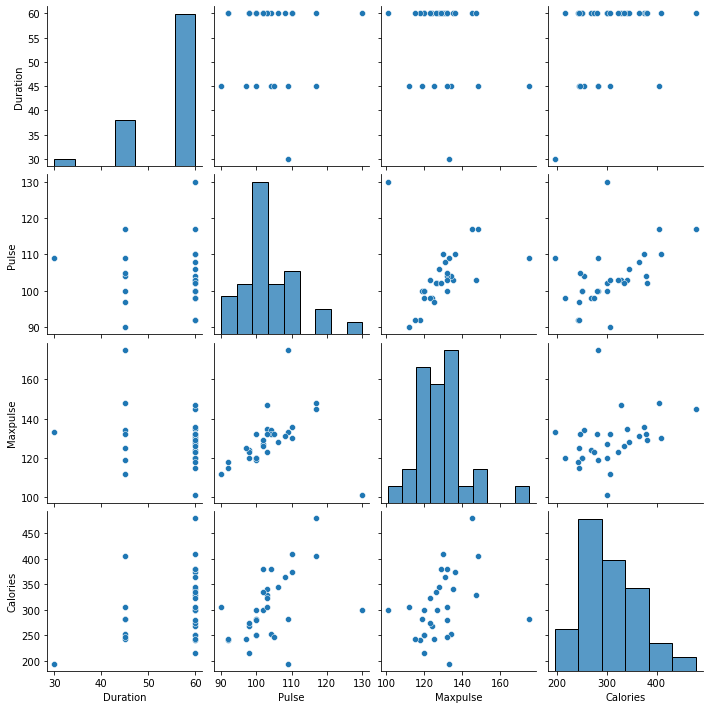

In [29]:
sns.pairplot(df)

We can see that 'Pulse' and 'Maxpulse' almost linearly related. 

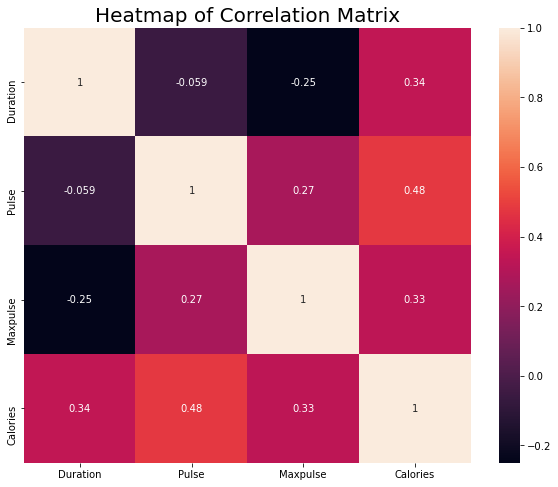

In [30]:
corr= df.corr()
plt.figure(figsize=(10,8))
plt.title("Heatmap of Correlation Matrix",fontsize=20)
sns.heatmap(corr, annot = True)
plt.show()

* All the features have very low correlation with each other.
* 'Duration' have negative low correlation with 'Pulse' and 'Maxpulse'.
* Others are positively correlated.